<a href="https://colab.research.google.com/github/SainiManisha/Data-Science_Tutorial/blob/master/Amazon_Product_Review_Dataset_LSTM_Data_Visualization_RegEx_SQLITE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv 

In [ ]:
data='/content/1429_1.csv'

In [ ]:
df=pd.read_csv(data)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
df.shape

(34660, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
review_rating = df.groupby("reviews.rating")

# Summary statistic 
review_rating.describe().head()

reviews.id                                ... reviews.userProvince            
                    count         mean std          min  ...                  25% 50% 75% max
reviews.rating                                           ...                                 
1.0                   0.0          NaN NaN          NaN  ...                  NaN NaN NaN NaN
2.0                   0.0          NaN NaN          NaN  ...                  NaN NaN NaN NaN
3.0                   0.0          NaN NaN          NaN  ...                  NaN NaN NaN NaN
4.0                   0.0          NaN NaN          NaN  ...                  NaN NaN NaN NaN
5.0                   1.0  111372787.0 NaN  111372787.0  ...                  NaN NaN NaN NaN

[5 rows x 32 columns]

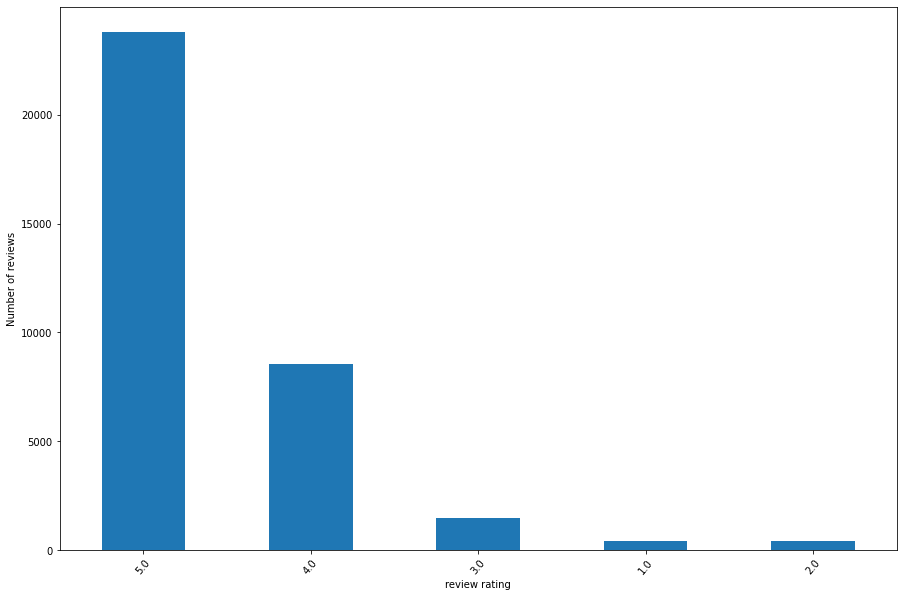

In [ ]:
plt.figure(figsize=(15,10))
review_rating.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("review rating")
plt.ylabel("Number of reviews")
plt.show()

In [ ]:
!pip install WordCloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 

In [ ]:
stopwords=list(stopwords)
print(stopwords)

['where', 'at', 'www', 'yourselves', 'no', 'own', "shan't", 'very', 'him', 'with', 'has', 'can', 'themselves', "you'd", 'should', 'for', 'myself', 'them', 'am', "hadn't", 'why', 'here', 'from', 'just', 'as', "we've", 'into', 'these', 'once', 'could', 'than', 'there', 'not', 'r', 'against', 'does', 'since', 'its', 'itself', 'himself', 'by', 'while', "why's", 'above', 'they', "she'll", "what's", "she'd", 'through', 'all', 'who', "we're", "they'd", 'her', 'and', 'but', 'how', 'http', "let's", "shouldn't", 'yours', "here's", "don't", 'those', "when's", 'ourselves', 'that', 'would', "it's", 'about', "isn't", 'me', 'it', 'otherwise', "there's", "they're", 'he', 'be', 'when', 'a', 'some', 'else', 'down', 'off', 'also', 'only', 'get', 'however', "we'll", "won't", 'had', "you'll", 'each', "he's", "that's", "mustn't", "haven't", 'been', "aren't", "you've", 'same', 'our', 'more', "hasn't", "wasn't", 'during', 'or', 'between', "couldn't", "didn't", 'few', 'is', 'then', "we'd", 'having', 'what', "w

In [ ]:
with open("/content/1429_1.csv") as f:
    reader= csv.DictReader(f) 
    text = ""

    for row in reader : 
        review_text = row['reviews.text']
        text = text + " " + review_text
            
    wordcloud = WordCloud(width=1000, height=1000, 
                stopwords=stopwords, background_color='white').generate(text) 

In [ ]:
text = []
df['reviews.text'].apply(lambda x: text.append(str(x)))
text = ' '.join(text)

wordcloud = WordCloud(width=1000, height=1000, 
            stopwords=stopwords, background_color='white').generate(text) 

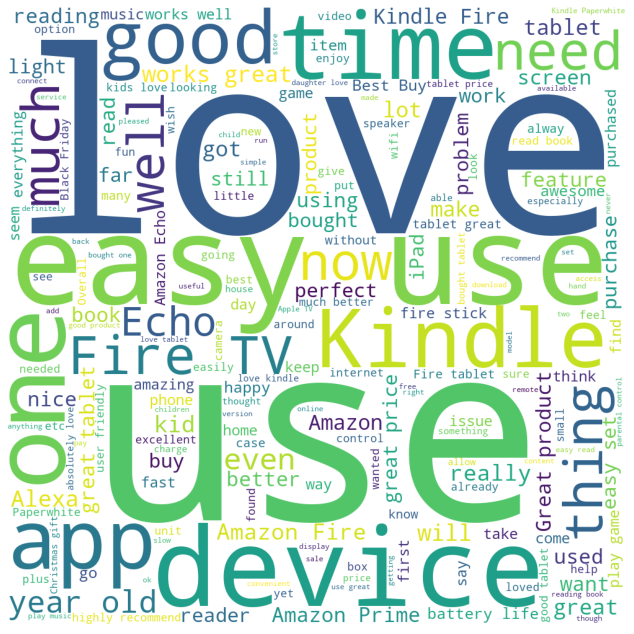

In [ ]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 5) 
  
plt.show() 

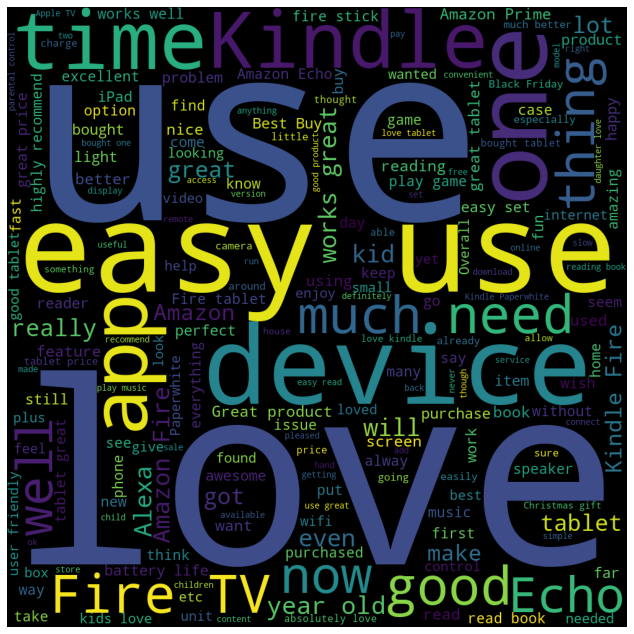

In [ ]:
wordcloud = WordCloud(width=1000, height=1000, 
            stopwords=stopwords, background_color='black').generate(text) 
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 5) 
  
plt.show()  

In [ ]:
# Save the image:
wordcloud.to_file("/content/review.png")

In [ ]:
import sqlite3

In [ ]:
conn=sqlite3.connect('amazon_review.db')

In [ ]:
df.to_sql('amazon_product_review', conn)

In [ ]:
sql='select * from amazon_product_review'
pd.read_sql(sql,conn)

,index,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,1.0,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,None,None,Adapter
1,1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,1.0,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,None,None,truman
2,2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,1.0,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,None,None,DaveZ
3,3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,1.0,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,None,None,Shacks
4,4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,1.0,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,None,None,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,34655,AVpfiBlyLJeJML43-4Tp,None,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,None,2015-08-29T00:00:00Z,NaN,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,None,None,Kris
34656,34656,AVpfiBlyLJeJML43-4Tp,None,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,None,2015-09-02T00:00:00Z,NaN,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,None,None,Jonathan Stewart
34657,34657,AVpfiBlyLJeJML43-4Tp,None,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,None,2015-09-04T00:00:00Z,NaN,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,None,None,J Lawson
34658,34658,AVpfiBlyLJeJML43-4Tp,None,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eB

In [ ]:
sql='select id,name from amazon_product_review'
pd.read_sql(sql,conn)

,id,name
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
...,...,...
34655,AVpfiBlyLJeJML43-4Tp,None
34656,AVpfiBlyLJeJML43-4Tp,None
34657,AVpfiBlyLJeJML43-4Tp,None
34658,AVpfiBlyLJeJML43-4Tp,None


In [ ]:
sql='select id,name, `reviews.title` from amazon_product_review'
pd.read_sql(sql,conn)

,id,name,reviews.title
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Kindle
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",very fast
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Beginner tablet for our 9 year old son.
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Good!!!
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Fantastic Tablet for kids
...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,None,Not appreciably faster than any other 1.8A cha...
34656,AVpfiBlyLJeJML43-4Tp,None,Should be included
34657,AVpfiBlyLJeJML43-4Tp,None,Disappointing Charger
34658,AVpfiBlyLJeJML43-4Tp,None,Not worth the money


In [ ]:
# sql='select id,name, `reviews.title`, `reviews.rating` from amazon_product_review where `reviews.rating`>4'
# pd.read_sql(sql,conn)

In [ ]:
new_df = df[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
new_df=new_df.dropna()
new_df.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [ ]:
from IPython.display import HTML
plot = df.groupby('categories',as_index=False).count()
HTML(pd.DataFrame(plot['categories']).to_html())

,categories
0,"Amazon Device Accessories,Kindle Store,Kindle Touch (4th Generation) Accessories,Kindle E-Reader Accessories,Covers,Kindle Touch (4th Generation) Covers"
1,"Amazon Devices & Accessories,Amazon Device Accessories,Power Adapters & Cables,Kindle Store,Kindle E-Reader Accessories,Kindle Paperwhite Accessories"
2,"Back To College,College Electronics,College Tvs & Home Theater,Electronics,Tvs & Home Theater,Streaming Devices,Featured Brands,Amazon Devices,Holiday Shop,Ways To Shop,TV & Home Theater,Streaming Media Players,All Streaming Media Players,TVs Entertainment,Video Games,Kindle Store,Electronics Features,Kids & Family,Fire TV"
3,"Cases,Kindle Store,Amazon Device Accessories,Accessories,Tablet Accessories"
4,"Categories,Streaming Media Players,Electronics"
5,"Chargers & Adapters,Computers & Accessories,Tablet & E-Reader Accessories,Amazon Devices & Accessories,Fire Tablet Accessories,Electronics,Power Adapters & Cables,Cell Phones,Amazon Device Accessories,Cell Phone Accessories,Cell Phone Batteries & Power,Tablet Accessories,Featured Brands,Kindle Fire (2nd Generation) Accessories,Kindle Store,Home Improvement,Fire (5th Generation) Accessories,Electrical,Amazon Devices,Home,Tablets & E-Readers,Cables & Chargers"
6,"Computers & Tablets,E-Readers & Accessories,eBook Readers,Kindle E-readers"
7,"Computers & Tablets,Tablets,All Tablets,Computers/Tablets & Networking,Tablets & eBook Readers,Fire Tablets,Frys"
8,"Computers/Tablets & Networking,Tablet & eBook Reader Accs,Chargers & Sync Cables,Power Adapters & Cables,Kindle Store,Amazon Device Accessories,Fire Tablet Accessories,Kindle Fire (2nd Generation) Accessories"
9,"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets"


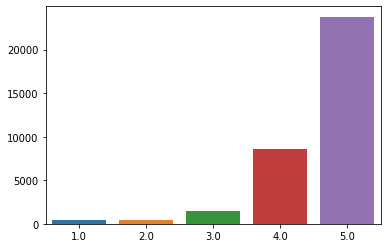

In [ ]:
import seaborn as sns
plot_1 = df.groupby('reviews.rating',as_index=False).count()
sns.barplot(x=plot_1['reviews.rating'].values,y=plot_1['id'].values)

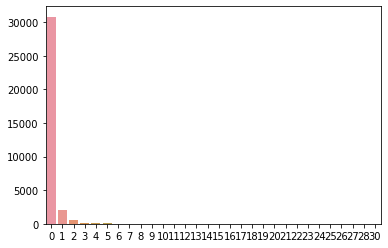

In [ ]:
plot_2 = df.groupby('reviews.numHelpful',as_index=False).count()[0:30]
sns.barplot(x=plot_2['reviews.numHelpful'].values.astype(int),y=plot_2['id'].values)

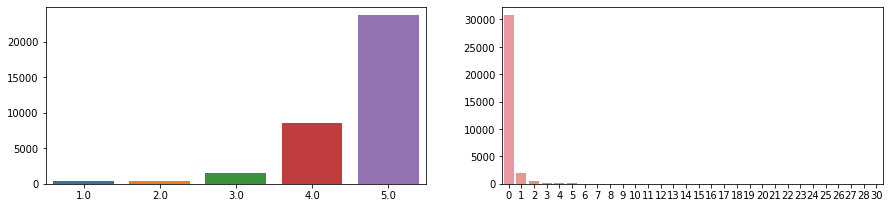

In [ ]:
plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((4, 2), (1, 0))
ax2 = plt.subplot2grid((4, 2), (1, 1))
import seaborn as sns
plot_1 = df.groupby('reviews.rating',as_index=False).count()
sns.barplot(x=plot_1['reviews.rating'].values,y=plot_1['id'].values,ax=ax1)
plot_2 = df.groupby('reviews.numHelpful',as_index=False).count()[0:30]
sns.barplot(x=plot_2['reviews.numHelpful'].values.astype(int),y=plot_2['id'].values,ax=ax2)

In [ ]:
import plotly.offline as pyo
import plotly.graph_objs as go
plot_3 = df.groupby('reviews.date').size()/df['categories'].count()*100
labels = plot_3.index
values = plot_3.values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.show()

In [ ]:
import regex as re
from typeguard import typechecked

@typechecked
def clean_text(s: str):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

In [ ]:
new_df['reviews.text'] = new_df['reviews.text'].apply(clean_text)

In [ ]:
df1 = new_df[['reviews.text', 'reviews.rating']]
df1

,reviews.text,reviews.rating
0,this product so far has not disappointed my ch...,5.0
1,great for beginner or experienced person bough...,5.0
2,inexpensive tablet for him to use and learn on...,5.0
3,i ve had my fire hd two weeks now and i love i...,4.0
4,i bought this for my grand daughter when she m...,5.0
...,...,...
34655,this is not appreciably faster than any other ...,3.0
34656,amazon should include this charger with the ki...,1.0
34657,love my kindle fire but i am really disappoint...,1.0
34658,i was surprised to find it did not me with any...,1.0


In [ ]:
X = df1['reviews.text']
y = df1['reviews.rating']

In [ ]:
X, y

(0        this product so far has not disappointed my ch...
 1        great for beginner or experienced person bough...
 2        inexpensive tablet for him to use and learn on...
 3        i ve had my fire hd two weeks now and i love i...
 4        i bought this for my grand daughter when she m...
                                ...                        
 34655    this is not appreciably faster than any other ...
 34656    amazon should include this charger with the ki...
 34657    love my kindle fire but i am really disappoint...
 34658    i was surprised to find it did not me with any...
 34659    to spite the fact that i have nothing but good...
 Name: reviews.text, Length: 34620, dtype: object, 0        5.0
 1        5.0
 2        5.0
 3        4.0
 4        5.0
         ... 
 34655    3.0
 34656    1.0
 34657    1.0
 34658    1.0
 34659    1.0
 Name: reviews.rating, Length: 34620, dtype: float64)

In [ ]:
all_words = set()
for text in X:
    for word in text.split(" "):
        all_words.add(word)
all_words = list(all_words)

In [ ]:
word_count = len(all_words)
word_count

13408

In [ ]:
word_indexes = []
for text in X:
    a = [] 
    for word in text.split(" "):
        idx = all_words.index(word)
        a.append(idx)
    word_indexes.append(a)

In [ ]:
max_sequence = 0
for word_idx in word_indexes:
    if len(word_idx) > max_sequence:
        max_sequence = len(word_idx)

In [ ]:
max_sequence

1849

In [ ]:
import tensorflow as tf
X = tf.ragged.constant(word_indexes)

In [ ]:
x = X.to_tensor()
x = x.numpy()
x

array([[10861,  1897, 10217, ...,     0,     0,     0],
       [ 7764,  1293,  6109, ...,     0,     0,     0],
       [ 7278,  4817,  1293, ...,     0,     0,     0],
       ...,
       [ 1982,   357,  6565, ...,     0,     0,     0],
       [10207,  7339,  3762, ...,     0,     0,     0],
       [ 3152,   451,  1488, ...,     0,     0,     0]], dtype=int32)

In [ ]:
t = y.values.astype('int32')
t = t - 1
np.min(t), np.max(t)

(0, 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,t,test_size=0.3)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding, Dropout, Dense, Flatten
from tensorflow.keras.models import Sequential

def model():
    model = Sequential()
    
    model.add(Embedding(word_count, 10, input_length = max_sequence))
    model.add(LSTM(150))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation = 'softmax'))
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer = 'adam',
                  metrics=['accuracy'])
    
    return model

In [ ]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1849, 10)          134080    
_________________________________________________________________
lstm (LSTM)                  (None, 150)               96600     
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 755       
Total params: 231,435
Trainable params: 231,435
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import *

callbacks = [
    TensorBoard(log_dir='logs'),
    ModelCheckpoint("Epoch{epoch:02d}.h5", monitor='categorical_crossentropy')
]


In [ ]:
X_train.shape

(24234, 1849)

In [ ]:
model.fit(X_train, y_train, epochs = 40, verbose =1,callbacks=callbacks, validation_data=(X_test, y_test))

Epoch 1/40
  1/758 [..............................] - ETA: 0s - loss: 1.6086 - accuracy: 0.2812WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
758/758 [==============================] - 323s 425ms/step - loss: 0.8624 - accuracy: 0.6834 - val_loss: 0.8461 - val_accuracy: 0.6906
Epoch 2/40
758/758 [==============================] - 321s 424ms/step - loss: 0.8494 - accuracy: 0.6848 - val_loss: 0.8444 - val_accuracy: 0.6906
Epoch 3/40
758/758 [==============================] - 322s 425ms/step - loss: 0.8487 - accuracy: 0.6848 - val_loss: 0.8428 - val_accuracy: 0.6906
Epoch 4/40
758/758 [==============================] - 322s 425ms/step - loss: 0.8479 - accuracy: 0.6848 - val_loss: 0.8441 - val_accuracy: 0.6906
Epoch 5/40
758/758 [==============================] - 

Reference:-Dataset
(1) https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products/notebooks
